# Reading Video and Frame 
The goal is to check if the gray scale values are correct

In [ ]:
# For reading depth camera
def read_depth_camera(dcamera_path, show_video, orig):
    video  = cv2.VideoCapture(dcamera_path)
    ret, frame = video.read()
    
    # Get total # of frame count 
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        
    frame_height = int(frame.shape[0])
    frame_width = int(frame.shape[1])

    
    depth_frames = np.empty((frame_count, frame_height, frame_width))
    depth_frames = np.empty((frame_count, frame_height, frame_width, 3))

    count = 0
    while (video.isOpened()):
        ret, frame = video.read()
        if ret == True:
            if colormap == 'gray':
                gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                gray_frame = cv2.resize(gray_frame, (frame_width, frame_height), interpolation = cv2.INTER_AREA)
                depth_frames[count] = gray_frame
            elif colormap == 'orig':
                depth_frames[count] = frame
            if show_video == True:
                cv2.imshow("Depth", frame)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
            count = count + 1
        else: 
            break
            

    video.release()
    cv2.destroyAllWindows()
    return depth_frames

In [ ]:
def play_video(read_frames):

    for i in range(len(read_frames)):
        # Capture frame-by-frame
        frame = read_frames[i]

        # Display the resulting frame
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

    return

In [266]:
def get_roi(frame):

#     For Neutral
#     y_start = 40
#     y_end = 100
    
#     x_start = 20
#     x_mid = 80

    
#     For Tilting Forward
#     y_start = 80
#     y_end = 105
    
#     x_start = 40
#     x_mid = 80
    
    #     For Tilting right
    y_start = 40
    y_end = 100
    
    x_start = 80
    x_mid = 120
    x_end = x_mid + (x_mid - x_start)
    
    
    mask = np.zeros((frame.shape), dtype=np.uint8)
    pts = np.array( [[[60,80],[65,120],[90,120],[80,75]]], dtype=np.int32 )
    cv2.fillPoly(mask, pts, (255,255,255))
    roi_1 = frame[np.where((mask == (255,255,255)).all(axis=2))]
    
    mask_2 = np.zeros((frame.shape), dtype=np.uint8)
    pts_2 = np.array( [[[60,120],[70,160],[100,150],[85,120]]], dtype=np.int32 )
    cv2.fillPoly(mask_2, pts_2, (255,255,255))
    roi_2 = frame[np.where((mask_2 == (255,255,255)).all(axis=2))]
    
    
#     roi = np.empty((2,y_end-y_start, x_mid-x_start, 3))
    

#     roi[0] = frame[y_start:y_end , x_start:x_mid]
#     roi[1] = frame[y_start:y_end , x_mid:x_end]


        

    return roi_1, roi_2

In [267]:
def compute_roi_d(read_frames):
    d_avg = np.zeros((read_frames.shape[0], 2))
    
    

    for i in range(len(read_frames)):
        # Capture frame-by-frame
        frame = read_frames[i]
#         roi = get_roi(frame)
#         d_avg[i,0] = np.mean(roi_1[:,:,1])
#         d_avg[i,1] = np.mean(roi_2[:,:,1])
        roi_1,roi_2 = get_roi(frame)
        print(roi_2)
        d_avg[i,0] = np.mean(roi_1[:,1])
        d_avg[i,1] = np.mean(roi_2[:,1])
        
        
        
        

    
    
    return(d_avg)

In [5]:
def play_frame(read_frames, frame_range):
      # Capture frame-by-frame

    # Display the resulting frame
    for i in frame_range:
        fig = plt.figure(figsize=(3,4))        
        a = plt.imshow(read_frames[i])
    return

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy import signal
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import random
import tensorflow as tf
import cv2


n_test = 13
date = '11_11_2020'
test_str = r'\test' + str(n_test)
data_dir = r"C:\Users\77bis\Box\CS598 - Final Project\Preliminary Data V4\Test_Subject_Leo" + test_str

train_dcamera_path = data_dir + r'\depth_processed_leo_test'+str(n_test)+'.avi'
show_video = 0
colormap = 'orig'
x_train = read_depth_camera(train_dcamera_path, show_video, colormap) / 255.0


In [157]:
colormap = 'orig'
play_video(x_train)

In [235]:
%matplotlib qt
import matplotlib.pyplot as plt

frame_range = [1,650,680,840]
play_frame(x_train,frame_range)

In [268]:
d_avg = compute_roi_d(x_train)

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [269]:
d_avg.shape

(1589, 2)

In [42]:
def read_output_data(qtm_file_data, theta):
    if theta=='x':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Lean Left/Right Angle (deg)"])
    if theta=='y':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Lean Forward/Backwards Angle (deg)"])
    if theta=='z':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Torso Twist Angle (deg)"])
        
    
    return qtm_data




In [43]:
n_test = 13
date = '11_11_2020'
test_str = r'\test' + str(n_test)
data_dir = r"C:\Users\77bis\Box\CS598 - Final Project\Preliminary Data V4\Test_Subject_Leo" + test_str
qtm_file_data_dir = data_dir + r'\qtm_processed_leo_test' + str(n_test) + '_' + date + '.txt'
show_qtm_plot = True
theta_interest = 'z'
y_train = read_output_data(qtm_file_data_dir,theta_interest)

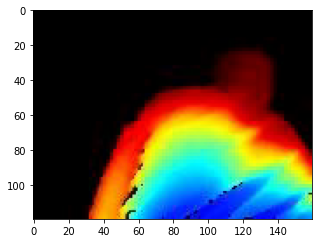

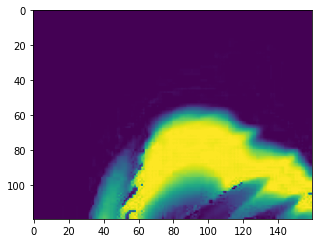

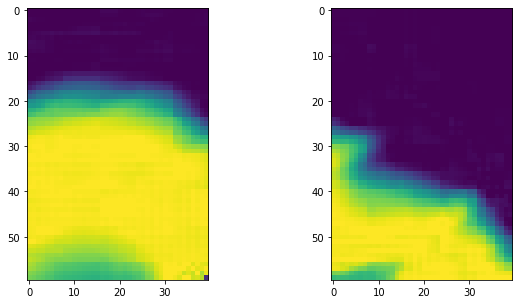

In [251]:
%matplotlib inline  

i_frame = 680

fig2 = plt.figure(figsize = (5,5))
plt.imshow(x_train[i_frame,:,:,:])

fig2 = plt.figure(figsize = (5,5))
plt.imshow(x_train[i_frame,:,:,bgr])


fig, axs = plt.subplots(2,1, figsize = (10,5))
bgr = 1
plt.subplot(121)
plt.imshow(x_train[i_frame,40:100,80:120,bgr])

plt.subplot(122)
plt.imshow(x_train[i_frame,40:100,120:160,bgr])




In [273]:
%matplotlib qt

# diff_d_avg = d_avg[:,1] - d_avg[:,0]
diff_d_avg = d_avg[:,0]




N = len(diff_d_avg)
y = y_train.values.flatten()
data_i = np.linspace(0,N,N) 
i_start = 650
i_end = 840
fig1 = plt.figure(figsize = (5,5))


a1= plt.plot(data_i[i_start:i_end] + 34, diff_d_avg[i_start:i_end])
a2 =plt.plot(data_i[i_start:i_end], y[i_start:i_end]/max(abs(y[i_start:i_end])))


plt.ylabel('twist angle(deg)')
plt.xlabel('data index')
plt.legend(['pred','true'])


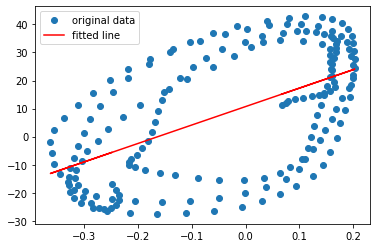

In [223]:
import numpy as np
from scipy import stats

X = diff_d_avg[i_start:i_end]
# y = 1 * x_0 + 2 * x_1 + 3
Y = y[i_start+34:i_end+34]
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

plt.plot(X, Y, 'o', label='original data')
plt.plot(X, intercept + slope*X, 'r', label='fitted line')
plt.legend()
plt.show()


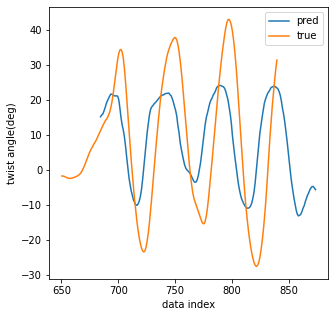

In [224]:
plt.figure(figsize = (5,5))


a1 =  plt.plot(data_i[i_start:i_end] + 34, intercept + slope * diff_d_avg[i_start:i_end])
a2 = plt.plot(data_i[i_start:i_end], y[i_start:i_end])

plt.ylabel('twist angle(deg)')
plt.xlabel('data index')
plt.legend(['pred','true'])


In [88]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]]).reshape(-1,1)
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.coef_

reg.intercept_

reg.predict(np.array([[3, 5]]))

print(X.shape)
print(y.shape)

(4, 2)
(4,)
